In [256]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [257]:
for i in range(45):
    if i==0:
        train = pd.read_pickle('salida/prueba/SICK/TRAIN_'+str(i+1)+'.csv_.pickle')
    else:
        temp = pd.read_pickle('salida/prueba/SICK/TRAIN_'+str(i+1)+'.csv_.pickle')
        train=pd.concat([train,temp])

In [258]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,bi_ent_trip_t,bi_ent_trip_h,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,Jaro-Winkler_relacionadas,c2_estructura,clases
0,0.000000,0.000000,2.709,0.000,0.000000e+00,0.000000,0.000000,1.000000,1,1,...,[old man],[],0.0,0.883333,4.5,0.237037,1.0,0.750000,5.0,CONTRADICTION
1,0.000000,120.901604,2.587,0.000,1.521449e-12,0.000000,0.000000,0.000000,3,3,...,[man standing],[old man],0.0,0.793750,3.5,0.200000,0.5,0.704762,4.0,CONTRADICTION
2,0.000000,0.000000,2.822,0.000,0.000000e+00,0.000000,0.000000,1.000000,1,1,...,"[young boys, playing outdoors, smiling nearby]",[playing outdoors],1.0,0.739219,1.0,0.222611,0.5,0.739219,1.0,ENTAILMENT
3,1.936215,352.233093,2.796,2.635,4.005303e+00,0.003240,0.366869,0.453524,1,3,...,[playing outdoors],[old man],0.0,0.495455,3.5,0.213636,0.5,0.495455,3.5,CONTRADICTION
4,2.200466,246.410538,2.719,2.763,3.977442e+00,0.003784,0.383626,0.274663,2,5,...,"[young boys, playing outdoors, smiling nearby]",[old man],0.0,0.505128,4.0,0.293590,1.5,0.505128,4.0,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,0.921605,287.121704,2.569,2.174,3.983796e+00,0.003068,0.328148,0.233538,1,2,...,[door is being opened man ],"[bald man, playing guitar, man is playing guit...",0.0,0.536538,2.0,0.000000,0.0,0.536538,2.0,CONTRADICTION
4435,0.875450,357.914948,2.650,1.977,2.673854e+00,0.017547,0.275713,0.435389,1,2,...,"[boiling okra, Someone is boiling okra ]",[man is not playing drums ],0.0,0.565476,1.5,0.255952,0.5,0.565476,1.5,CONTRADICTION
4436,0.737211,801.840088,2.214,1.723,2.265712e+00,0.001845,0.170513,0.433309,1,2,...,"[singing heartily, man is singing guitar , man...",[bicyclist is holding bike ],0.0,0.392157,1.0,0.223312,0.5,0.392157,1.0,CONTRADICTION
4437,1.681473,461.103546,2.579,2.530,3.038282e+00,0.014040,0.319359,0.446750,0,0,...,"[yellow ball, man has ball ]","[jumping rope, man is jumping rope ]",0.0,0.511544,0.5,0.000000,0.0,0.511544,0.5,CONTRADICTION


<Axes: title={'center': 'list_incomp'}, xlabel='clases'>

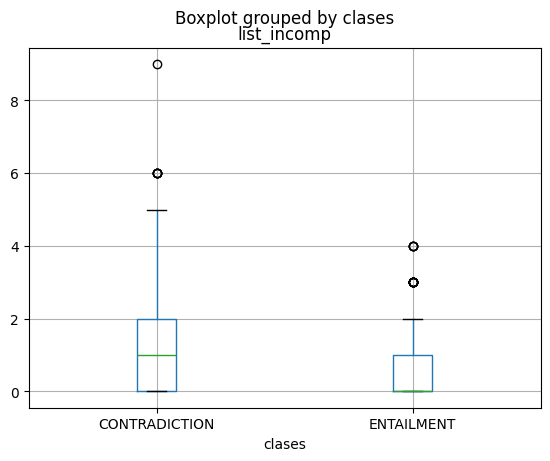

In [259]:
train.boxplot(by="clases",column="list_incomp")

## Eliminar características

In [260]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
train=train.drop(["list_relaciones","listas_malignf","listas_malign","bi_ent_trip_t","bi_ent_trip_h"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,list_cuatrigram,diferencias,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,Jaro-Winkler_relacionadas,c2_estructura,clases
0,0.000000,0.000000,2.709,0.000,0.000000e+00,0.000000,0.000000,1.000000,1,1,...,0.266667,0.000000,0.0,0.883333,4.5,0.237037,1.0,0.750000,5.0,CONTRADICTION
1,0.000000,120.901604,2.587,0.000,1.521449e-12,0.000000,0.000000,0.000000,3,3,...,0.117647,0.050000,0.0,0.793750,3.5,0.200000,0.5,0.704762,4.0,CONTRADICTION
2,0.000000,0.000000,2.822,0.000,0.000000e+00,0.000000,0.000000,1.000000,1,1,...,0.000000,0.000000,1.0,0.739219,1.0,0.222611,0.5,0.739219,1.0,ENTAILMENT
3,1.936215,352.233093,2.796,2.635,4.005303e+00,0.003240,0.366869,0.453524,1,3,...,0.000000,0.272727,0.0,0.495455,3.5,0.213636,0.5,0.495455,3.5,CONTRADICTION
4,2.200466,246.410538,2.719,2.763,3.977442e+00,0.003784,0.383626,0.274663,2,5,...,0.000000,0.153846,0.0,0.505128,4.0,0.293590,1.5,0.505128,4.0,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,0.921605,287.121704,2.569,2.174,3.983796e+00,0.003068,0.328148,0.233538,1,2,...,0.000000,0.250000,0.0,0.536538,2.0,0.000000,0.0,0.536538,2.0,CONTRADICTION
4435,0.875450,357.914948,2.650,1.977,2.673854e+00,0.017547,0.275713,0.435389,1,2,...,0.000000,0.428571,0.0,0.565476,1.5,0.255952,0.5,0.565476,1.5,CONTRADICTION
4436,0.737211,801.840088,2.214,1.723,2.265712e+00,0.001845,0.170513,0.433309,1,2,...,0.000000,0.777778,0.0,0.392157,1.0,0.223312,0.5,0.392157,1.0,CONTRADICTION
4437,1.681473,461.103546,2.579,2.530,3.038282e+00,0.014040,0.319359,0.446750,0,0,...,0.000000,0.363636,0.0,0.511544,0.5,0.000000,0.0,0.511544,0.5,CONTRADICTION


In [261]:
train=train.drop(["Jaro-Winkler_relacionadas","sumas","entropia_total","distancias","max_info","similitud_faltantes","list_trigram","list_rel_con",'list_M', 'list_m', 'list_T','list_cuatrigram', 'diferencias'],axis=1)

In [262]:
#train["Shape Origin"] = train["Shape Origin"] / train["Total T"]
#train["Shape Finish"] = train["Shape Finish"] / train["Total T"]

In [263]:
#train=train.drop(["Total T"],axis=1)

In [264]:
train

,entropias,mutinf,mearts,list_comp,list_incomp,list_bigram,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,c2_estructura,clases
0,0.000,0.000000e+00,0.000000,1,1,0.647059,0.0,0.883333,4.5,0.237037,1.0,5.0,CONTRADICTION
1,0.000,1.521449e-12,0.000000,3,3,0.368421,0.0,0.793750,3.5,0.200000,0.5,4.0,CONTRADICTION
2,0.000,0.000000e+00,0.000000,1,1,0.200000,1.0,0.739219,1.0,0.222611,0.5,1.0,ENTAILMENT
3,2.635,4.005303e+00,0.003240,1,3,0.000000,0.0,0.495455,3.5,0.213636,0.5,3.5,CONTRADICTION
4,2.763,3.977442e+00,0.003784,2,5,0.052632,0.0,0.505128,4.0,0.293590,1.5,4.0,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,2.174,3.983796e+00,0.003068,1,2,0.000000,0.0,0.536538,2.0,0.000000,0.0,2.0,CONTRADICTION
4435,1.977,2.673854e+00,0.017547,1,2,0.000000,0.0,0.565476,1.5,0.255952,0.5,1.5,CONTRADICTION
4436,1.723,2.265712e+00,0.001845,1,2,0.000000,0.0,0.392157,1.0,0.223312,0.5,1.0,CONTRADICTION
4437,2.530,3.038282e+00,0.014040,0,0,0.166667,0.0,0.511544,0.5,0.000000,0.0,0.5,CONTRADICTION


In [265]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [266]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [267]:
train_m

,entropias,mutinf,mearts,list_comp,list_incomp,list_bigram,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,c2_estructura
entropias,1.000000,0.939361,0.113332,0.141448,0.172171,-0.504483,-0.283234,-0.529430,0.195568,-0.069313,0.011378,0.179044
mutinf,0.939361,1.000000,0.061250,0.083870,0.106264,-0.455949,-0.271709,-0.468167,0.138772,-0.079277,-0.017057,0.120952
mearts,0.113332,0.061250,1.000000,0.085601,0.074317,-0.160943,-0.107744,-0.103842,-0.050886,0.044690,0.042208,-0.062826
list_comp,0.141448,0.083870,0.085601,1.000000,0.740427,-0.431657,-0.227132,-0.348635,0.193313,0.138829,0.273434,0.207178
list_incomp,0.172171,0.106264,0.074317,0.740427,1.000000,-0.470209,-0.242730,-0.426403,0.206303,0.159771,0.323655,0.216610
list_bigram,-0.504483,-0.455949,-0.160943,-0.431657,-0.470209,1.000000,0.555141,0.851498,-0.238408,0.053260,-0.120295,-0.207859
bi_ent_trip_rel,-0.283234,-0.271709,-0.107744,-0.227132,-0.242730,0.555141,1.000000,0.458162,-0.055443,0.056021,-0.037348,-0.013086
Jaro-Winkler_rit,-0.529430,-0.468167,-0.103842,-0.348635,-0.426403,0.851498,0.458162,1.000000,-0.324742,0.068523,-0.089776,-0.278841
c_estructura,0.195568,0.138772,-0.050886,0.193313,0.206303,-0.238408,-0.055443,-0.324742,1.000000,-0.015596,0.101244,0.923503
Jaro-Winkler_contra,-0.069313,-0.079277,0.044690,0.138829,0.159771,0.053260,0.056021,0.068523,-0.015596,1.000000,0.701900,-0.004634


<Axes: >

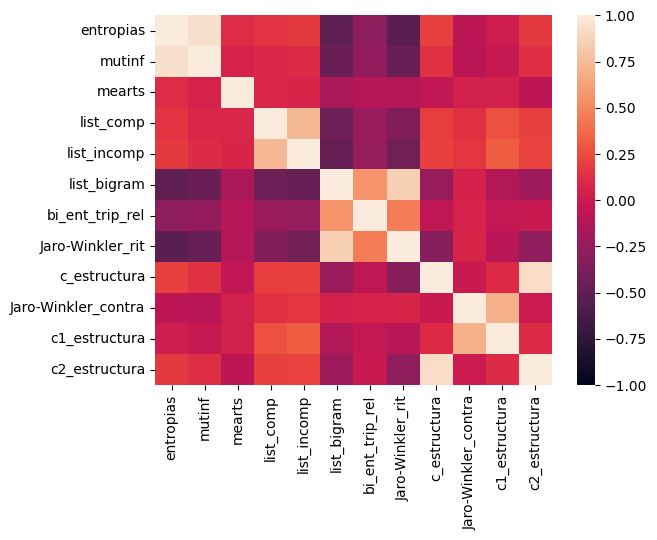

In [268]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [269]:
train_m

,entropias,mutinf,mearts,list_comp,list_incomp,list_bigram,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,c2_estructura
entropias,1.000000,0.939361,0.113332,0.141448,0.172171,-0.504483,-0.283234,-0.529430,0.195568,-0.069313,0.011378,0.179044
mutinf,0.939361,1.000000,0.061250,0.083870,0.106264,-0.455949,-0.271709,-0.468167,0.138772,-0.079277,-0.017057,0.120952
mearts,0.113332,0.061250,1.000000,0.085601,0.074317,-0.160943,-0.107744,-0.103842,-0.050886,0.044690,0.042208,-0.062826
list_comp,0.141448,0.083870,0.085601,1.000000,0.740427,-0.431657,-0.227132,-0.348635,0.193313,0.138829,0.273434,0.207178
list_incomp,0.172171,0.106264,0.074317,0.740427,1.000000,-0.470209,-0.242730,-0.426403,0.206303,0.159771,0.323655,0.216610
list_bigram,-0.504483,-0.455949,-0.160943,-0.431657,-0.470209,1.000000,0.555141,0.851498,-0.238408,0.053260,-0.120295,-0.207859
bi_ent_trip_rel,-0.283234,-0.271709,-0.107744,-0.227132,-0.242730,0.555141,1.000000,0.458162,-0.055443,0.056021,-0.037348,-0.013086
Jaro-Winkler_rit,-0.529430,-0.468167,-0.103842,-0.348635,-0.426403,0.851498,0.458162,1.000000,-0.324742,0.068523,-0.089776,-0.278841
c_estructura,0.195568,0.138772,-0.050886,0.193313,0.206303,-0.238408,-0.055443,-0.324742,1.000000,-0.015596,0.101244,0.923503
Jaro-Winkler_contra,-0.069313,-0.079277,0.044690,0.138829,0.159771,0.053260,0.056021,0.068523,-0.015596,1.000000,0.701900,-0.004634


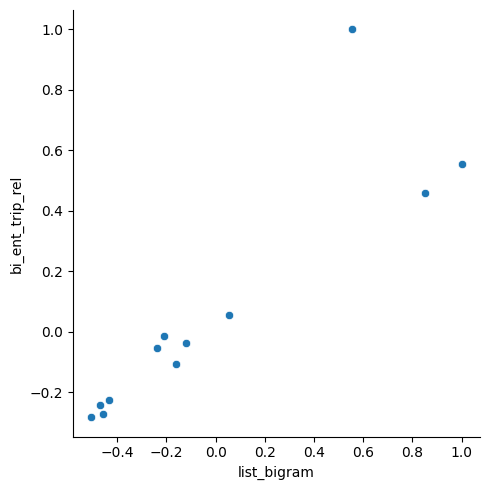

In [270]:
# Checar variables colineales
sns.relplot(data=train_m, x="list_bigram", y="bi_ent_trip_rel")

In [271]:
#X_dev = np.array(dev.drop(['CLASS'],axis=1))
#y_d = np.array(dev['CLASS'])

In [272]:
# SICK
y_train=[]
for i in y_:
    if i == "ENTAILMENT":
        y_train.append(1)
    else:
        y_train.append(0)

In [273]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

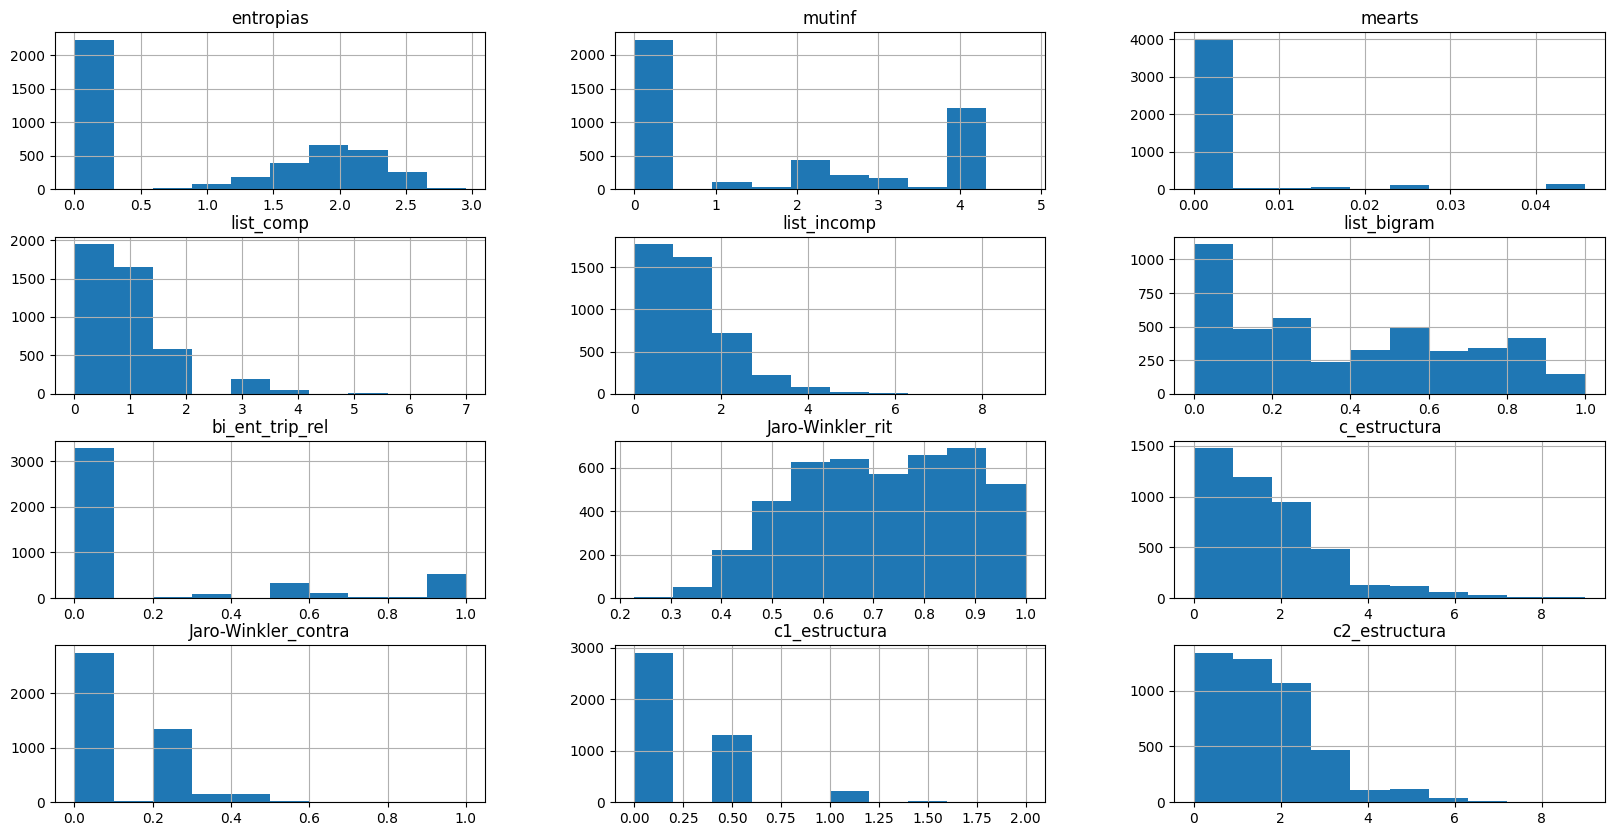

In [274]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [275]:
for i in range(50):
    if i==0:
        test = pd.read_pickle('salida/prueba/SICK/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/prueba/SICK/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            pass

In [276]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,bi_ent_trip_t,bi_ent_trip_h,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,Jaro-Winkler_relacionadas,c2_estructura,clases
0,2.490776,358.226257,2.493,2.152,2.610263,0.002234,0.367359,0.542249,2,4,...,"[boy playing, playing outdoors, man smiling]",[old man],0.0,0.490476,4.0,0.207143,0.5,0.490476,4.0,CONTRADICTION
1,2.243210,488.595612,2.761,2.144,2.985943,0.002616,0.304873,0.437014,1,0,...,[],"[young boys, playing outdoors, smiling nearby]",0.0,0.475783,3.5,0.421652,0.0,0.475783,3.5,CONTRADICTION
2,2.341030,368.910126,2.621,2.027,2.638021,0.002065,0.333035,0.465688,2,3,...,[man standing],"[young boys, playing outdoors, smiling nearby]",0.0,0.510440,2.5,0.208974,0.5,0.510440,2.5,CONTRADICTION
3,0.000000,0.000000,2.879,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,"[brown dog, tall man, dog is attacking animal ]","[brown dog, dog is attacking animal ]",1.0,0.949673,0.5,0.416993,0.0,0.895145,1.0,ENTAILMENT
4,2.932724,120.103088,2.907,2.226,3.988292,0.002701,0.473630,0.368394,0,0,...,"[brown dog, dog is attacking animal ]","[brown dog, dog is helping animal ]",0.5,0.955556,0.0,0.422222,0.0,0.838889,1.0,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,1.046270,465.883575,2.455,1.965,2.984976,0.002488,0.284545,0.247970,1,0,...,"[young girl, girl is blowing bubble ]",[pink twirling],0.0,0.440657,1.5,0.000000,0.0,0.440657,1.5,CONTRADICTION
4802,0.270148,230.491837,2.606,0.832,2.010751,0.024160,0.119315,0.084953,2,2,...,[colored coat],[flute is being played man ],0.0,0.638047,3.5,0.000000,0.0,0.638047,3.5,CONTRADICTION
4803,0.394118,467.390717,2.143,1.798,2.954712,0.002730,0.194197,0.276522,2,2,...,"[happily playing, boy is playing piano ]","[white bird, landing swiftly]",0.0,0.502646,0.0,0.000000,0.0,0.502646,0.0,CONTRADICTION
4804,1.751488,456.147644,2.607,2.127,2.977532,0.002593,0.300975,0.493321,2,3,...,"[pony tail, girl is combing hair ]","[people wearing, wearing helmets, white flowers]",0.0,0.463370,3.0,0.000000,0.0,0.463370,3.0,CONTRADICTION


In [277]:
test=test.drop(["list_relaciones","listas_malign","listas_malignf","bi_ent_trip_t","bi_ent_trip_h"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,list_cuatrigram,diferencias,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,Jaro-Winkler_relacionadas,c2_estructura,clases
0,2.490776,358.226257,2.493,2.152,2.610263,0.002234,0.367359,0.542249,2,4,...,0.000000,0.214286,0.0,0.490476,4.0,0.207143,0.5,0.490476,4.0,CONTRADICTION
1,2.243210,488.595612,2.761,2.144,2.985943,0.002616,0.304873,0.437014,1,0,...,0.000000,0.222222,0.0,0.475783,3.5,0.421652,0.0,0.475783,3.5,CONTRADICTION
2,2.341030,368.910126,2.621,2.027,2.638021,0.002065,0.333035,0.465688,2,3,...,0.000000,0.150000,0.0,0.510440,2.5,0.208974,0.5,0.510440,2.5,CONTRADICTION
3,0.000000,0.000000,2.879,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,0.750000,0.000000,1.0,0.949673,0.5,0.416993,0.0,0.895145,1.0,ENTAILMENT
4,2.932724,120.103088,2.907,2.226,3.988292,0.002701,0.473630,0.368394,0,0,...,0.666667,0.066667,0.5,0.955556,0.0,0.422222,0.0,0.838889,1.0,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,1.046270,465.883575,2.455,1.965,2.984976,0.002488,0.284545,0.247970,1,0,...,0.000000,0.333333,0.0,0.440657,1.5,0.000000,0.0,0.440657,1.5,CONTRADICTION
4802,0.270148,230.491837,2.606,0.832,2.010751,0.024160,0.119315,0.084953,2,2,...,0.000000,0.181818,0.0,0.638047,3.5,0.000000,0.0,0.638047,3.5,CONTRADICTION
4803,0.394118,467.390717,2.143,1.798,2.954712,0.002730,0.194197,0.276522,2,2,...,0.000000,0.571429,0.0,0.502646,0.0,0.000000,0.0,0.502646,0.0,CONTRADICTION
4804,1.751488,456.147644,2.607,2.127,2.977532,0.002593,0.300975,0.493321,2,3,...,0.000000,0.285714,0.0,0.463370,3.0,0.000000,0.0,0.463370,3.0,CONTRADICTION


In [278]:
test=test.drop(["Jaro-Winkler_relacionadas","sumas","entropia_total","distancias","max_info","similitud_faltantes","list_trigram","list_rel_con",'list_M', 'list_m', 'list_T','list_cuatrigram', 'diferencias'],axis=1)
test

,entropias,mutinf,mearts,list_comp,list_incomp,list_bigram,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,c2_estructura,clases
0,2.152,2.610263,0.002234,2,4,0.000000,0.0,0.490476,4.0,0.207143,0.5,4.0,CONTRADICTION
1,2.144,2.985943,0.002616,1,0,0.083333,0.0,0.475783,3.5,0.421652,0.0,3.5,CONTRADICTION
2,2.027,2.638021,0.002065,2,3,0.000000,0.0,0.510440,2.5,0.208974,0.5,2.5,CONTRADICTION
3,0.000,0.000000,0.000000,0,0,0.928571,1.0,0.949673,0.5,0.416993,0.0,1.0,ENTAILMENT
4,2.226,3.988292,0.002701,0,0,0.857143,0.5,0.955556,0.0,0.422222,0.0,1.0,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,1.965,2.984976,0.002488,1,0,0.000000,0.0,0.440657,1.5,0.000000,0.0,1.5,CONTRADICTION
4802,0.832,2.010751,0.024160,2,2,0.000000,0.0,0.638047,3.5,0.000000,0.0,3.5,CONTRADICTION
4803,1.798,2.954712,0.002730,2,2,0.000000,0.0,0.502646,0.0,0.000000,0.0,0.0,CONTRADICTION
4804,2.127,2.977532,0.002593,2,3,0.000000,0.0,0.463370,3.0,0.000000,0.0,3.0,CONTRADICTION


In [279]:
#test["Shape Origin"] = test["Shape Origin"] / test["Total T"]
#test["Shape Finish"] = test["Shape Finish"] / test["Total T"]

In [280]:
test

,entropias,mutinf,mearts,list_comp,list_incomp,list_bigram,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,c2_estructura,clases
0,2.152,2.610263,0.002234,2,4,0.000000,0.0,0.490476,4.0,0.207143,0.5,4.0,CONTRADICTION
1,2.144,2.985943,0.002616,1,0,0.083333,0.0,0.475783,3.5,0.421652,0.0,3.5,CONTRADICTION
2,2.027,2.638021,0.002065,2,3,0.000000,0.0,0.510440,2.5,0.208974,0.5,2.5,CONTRADICTION
3,0.000,0.000000,0.000000,0,0,0.928571,1.0,0.949673,0.5,0.416993,0.0,1.0,ENTAILMENT
4,2.226,3.988292,0.002701,0,0,0.857143,0.5,0.955556,0.0,0.422222,0.0,1.0,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,1.965,2.984976,0.002488,1,0,0.000000,0.0,0.440657,1.5,0.000000,0.0,1.5,CONTRADICTION
4802,0.832,2.010751,0.024160,2,2,0.000000,0.0,0.638047,3.5,0.000000,0.0,3.5,CONTRADICTION
4803,1.798,2.954712,0.002730,2,2,0.000000,0.0,0.502646,0.0,0.000000,0.0,0.0,CONTRADICTION
4804,2.127,2.977532,0.002593,2,3,0.000000,0.0,0.463370,3.0,0.000000,0.0,3.0,CONTRADICTION


In [281]:
#test=test.drop(["Total T"],axis=1)

In [282]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [283]:
# SICK
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    else:
        y_test.append(0)

In [284]:
y_test.count(1)

1379

In [285]:
y_test.count(0)

3427

In [286]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [287]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [288]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [289]:
#X_train = np.where(np.isnan(X_train), 0, X_train)
#X_train

In [290]:
X_train.shape

(4439, 12)

In [291]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [292]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [293]:
model.decision_function(X)

array([-1.20100814, -1.32765796, -1.52267548, ..., -4.13671147,
       -2.47035818, -3.69200127])

In [294]:
labels=train.columns[:-1]
labels

Index(['entropias', 'mutinf', 'mearts', 'list_comp', 'list_incomp',
       'list_bigram', 'bi_ent_trip_rel', 'Jaro-Winkler_rit', 'c_estructura',
       'Jaro-Winkler_contra', 'c1_estructura', 'c2_estructura'],
      dtype='object')

In [295]:
model.classes_

array([0, 1])

In [296]:
model.coef_[0]

array([-0.9031373 , -0.84851399, -0.24031333,  0.42495105, -2.74638554,
        0.85421963,  0.07647232,  3.24143225,  1.09637718, -0.33082699,
       -4.17112854,  0.38318089])

In [297]:
coeficientes=model.coef_[0]

In [298]:
coeficientes

array([-0.9031373 , -0.84851399, -0.24031333,  0.42495105, -2.74638554,
        0.85421963,  0.07647232,  3.24143225,  1.09637718, -0.33082699,
       -4.17112854,  0.38318089])

In [299]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  7 Jaro-Winkler_rit 10 c1_estructura


In [300]:
n_columns=train.shape[1]-1

In [301]:
n_columns

12

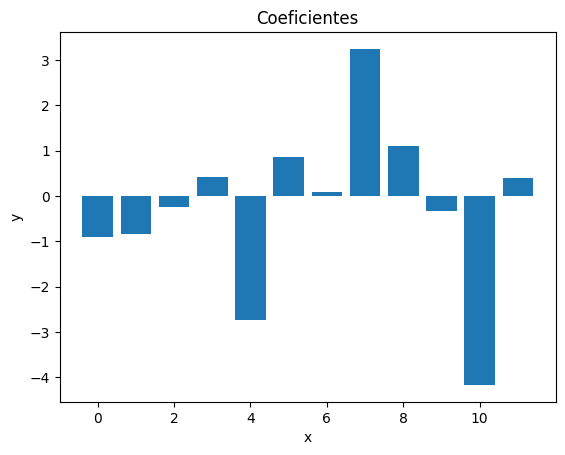

In [302]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [303]:
#X_test = np.where(np.isnan(X_test), 0, X_test)
#X_test

In [304]:
X_test.shape

(4806, 12)

In [305]:
predictions = model.predict(X_test)

In [306]:
test["predictions"]=predictions
test

,entropias,mutinf,mearts,list_comp,list_incomp,list_bigram,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,c2_estructura,clases,predictions
0,2.152,2.610263,0.002234,2,4,0.000000,0.0,0.490476,4.0,0.207143,0.5,4.0,CONTRADICTION,0
1,2.144,2.985943,0.002616,1,0,0.083333,0.0,0.475783,3.5,0.421652,0.0,3.5,CONTRADICTION,0
2,2.027,2.638021,0.002065,2,3,0.000000,0.0,0.510440,2.5,0.208974,0.5,2.5,CONTRADICTION,0
3,0.000,0.000000,0.000000,0,0,0.928571,1.0,0.949673,0.5,0.416993,0.0,1.0,ENTAILMENT,1
4,2.226,3.988292,0.002701,0,0,0.857143,0.5,0.955556,0.0,0.422222,0.0,1.0,CONTRADICTION,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,1.965,2.984976,0.002488,1,0,0.000000,0.0,0.440657,1.5,0.000000,0.0,1.5,CONTRADICTION,0
4802,0.832,2.010751,0.024160,2,2,0.000000,0.0,0.638047,3.5,0.000000,0.0,3.5,CONTRADICTION,0
4803,1.798,2.954712,0.002730,2,2,0.000000,0.0,0.502646,0.0,0.000000,0.0,0.0,CONTRADICTION,0
4804,2.127,2.977532,0.002593,2,3,0.000000,0.0,0.463370,3.0,0.000000,0.0,3.0,CONTRADICTION,0


In [307]:
test.to_csv("predictions_SICK_DEV.csv")

In [308]:
print(confusion_matrix(y_test, predictions,labels=[1,0]))

[[ 746  633]
 [ 339 3088]]


In [309]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.8
precision:  0.69
recall 0.54
f1_score:  0.61
matthews_score:  0.48


In [310]:
X_train.shape

(4439, 12)

In [311]:
X_test.shape

(4806, 12)

In [312]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [313]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [314]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.800000 (0.028595)
Logistic Regression Precision:: 0.680000 (0.068744)
Logistic Regression Recall:: 0.570000 (0.056450)
Logistic Regression F1-score:: 0.620000 (0.052736)


In [315]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.490000 (0.059803)


In [316]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [317]:
#linear_model

In [318]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [319]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      3427
           1       0.69      0.54      0.61      1379

    accuracy                           0.80      4806
   macro avg       0.76      0.72      0.73      4806
weighted avg       0.79      0.80      0.79      4806



In [320]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [321]:
test.columns[:-1]

Index(['entropias', 'mutinf', 'mearts', 'list_comp', 'list_incomp',
       'list_bigram', 'bi_ent_trip_rel', 'Jaro-Winkler_rit', 'c_estructura',
       'Jaro-Winkler_contra', 'c1_estructura', 'c2_estructura', 'clases'],
      dtype='object')

In [322]:
explainer.expected_value

-1.0893533149312882

In [323]:
X_test

array([[0.76096181, 0.54551853, 0.04871072, ..., 0.20714286, 0.2       ,
        0.38095238],
       [0.75813296, 0.62403183, 0.05703323, ..., 0.42165242, 0.        ,
        0.33333333],
       [0.71676096, 0.55131972, 0.04501489, ..., 0.20897436, 0.2       ,
        0.23809524],
       ...,
       [0.63578501, 0.61750493, 0.05951311, ..., 0.        , 0.        ,
        0.        ],
       [0.75212164, 0.62227418, 0.05653257, ..., 0.        , 0.        ,
        0.28571429],
       [0.71393211, 0.66596826, 0.05280392, ..., 0.        , 0.        ,
        0.14285714]])

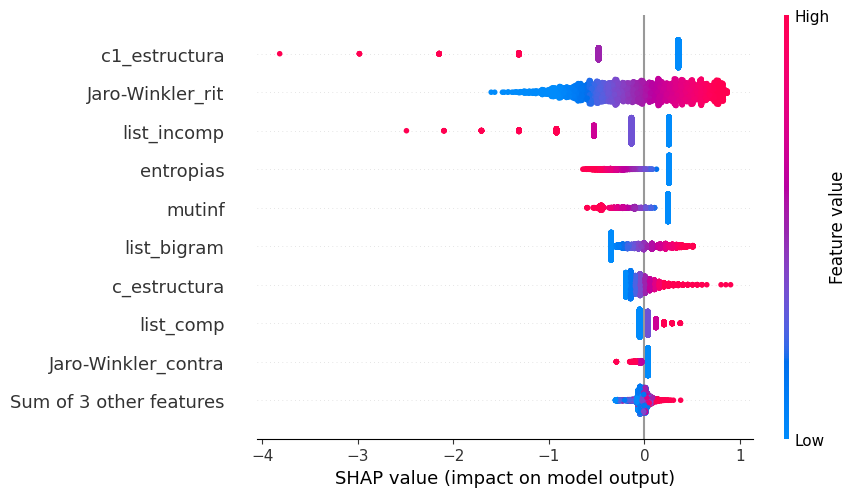

In [324]:
shap.plots.beeswarm(shap_values)

[0.77847474 0.82276753 0.04861899 0.         0.         0.
 0.22222222 0.09090909 0.3047619  0.2        0.08333333 0.66666667] 0 1


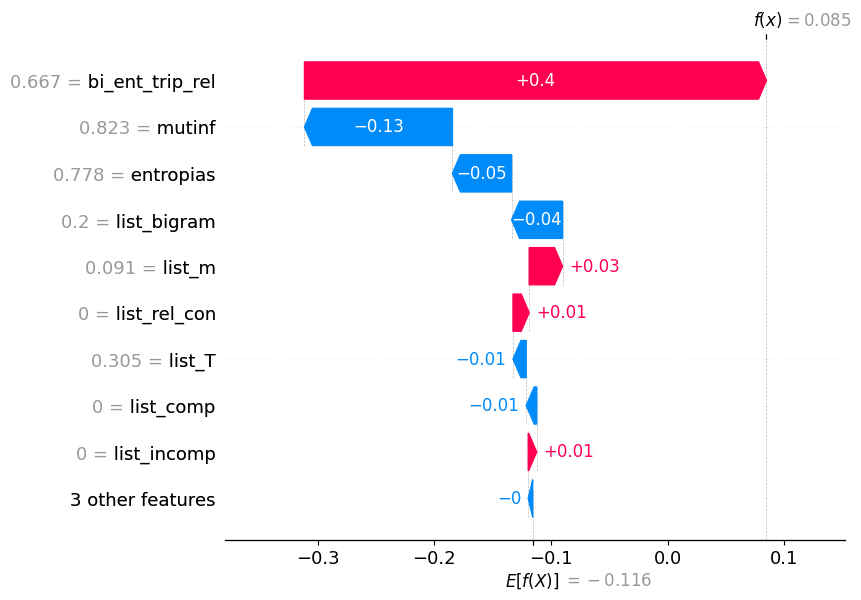

In [121]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

In [122]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.         0.         0.         0.         0.         0.
 0.25925926 0.         0.31428571 0.33333333 0.         0.66666667]


IndexError: index 1 is out of bounds for axis 2 with size 1

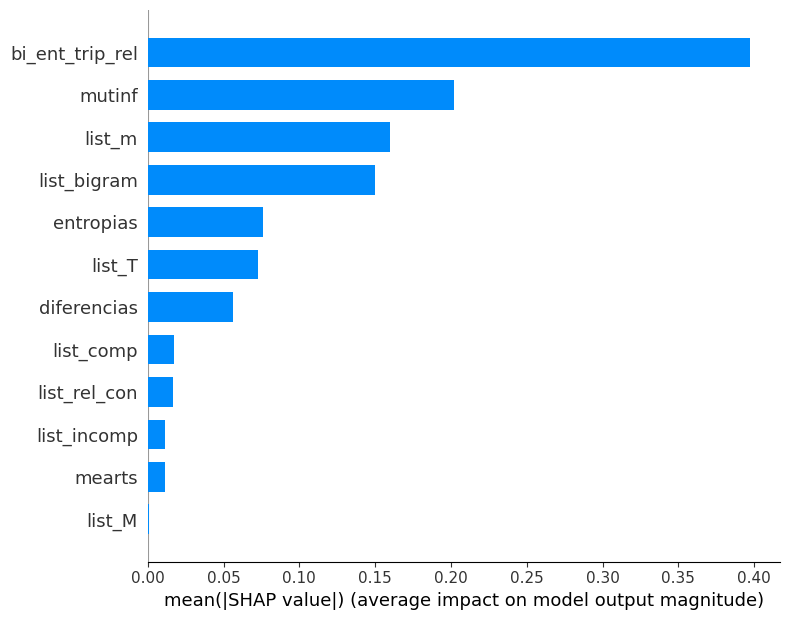

In [123]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

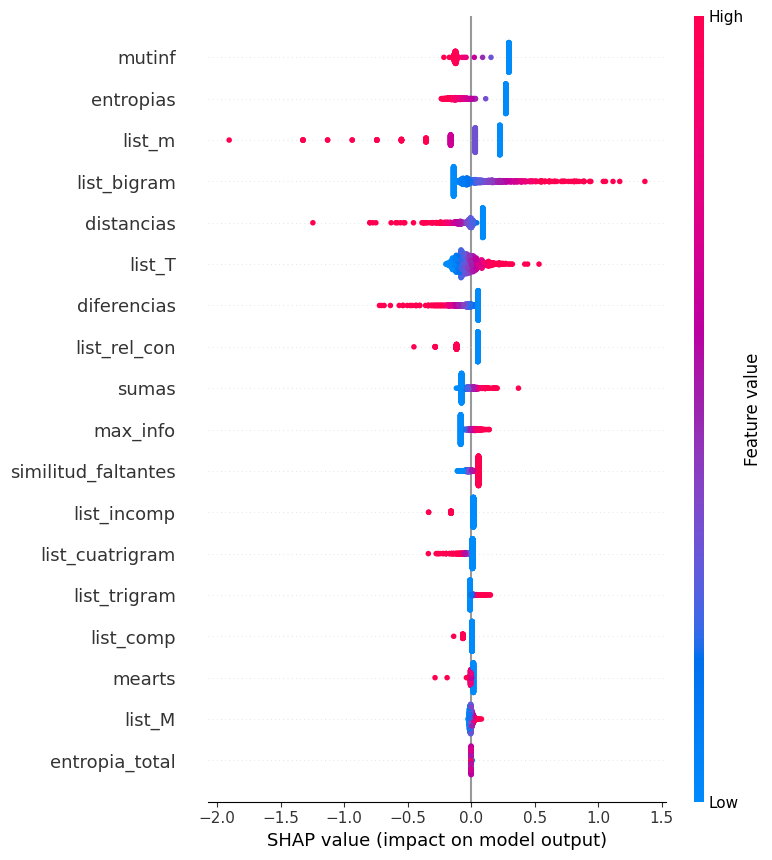

In [81]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

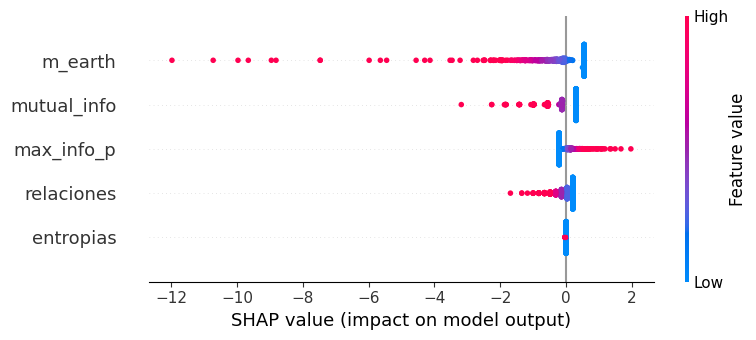

In [ ]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

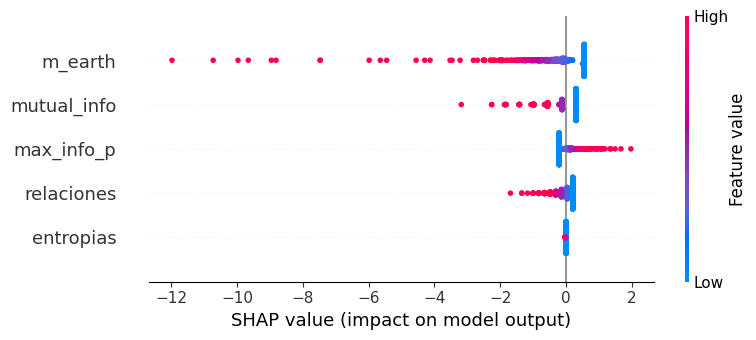

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


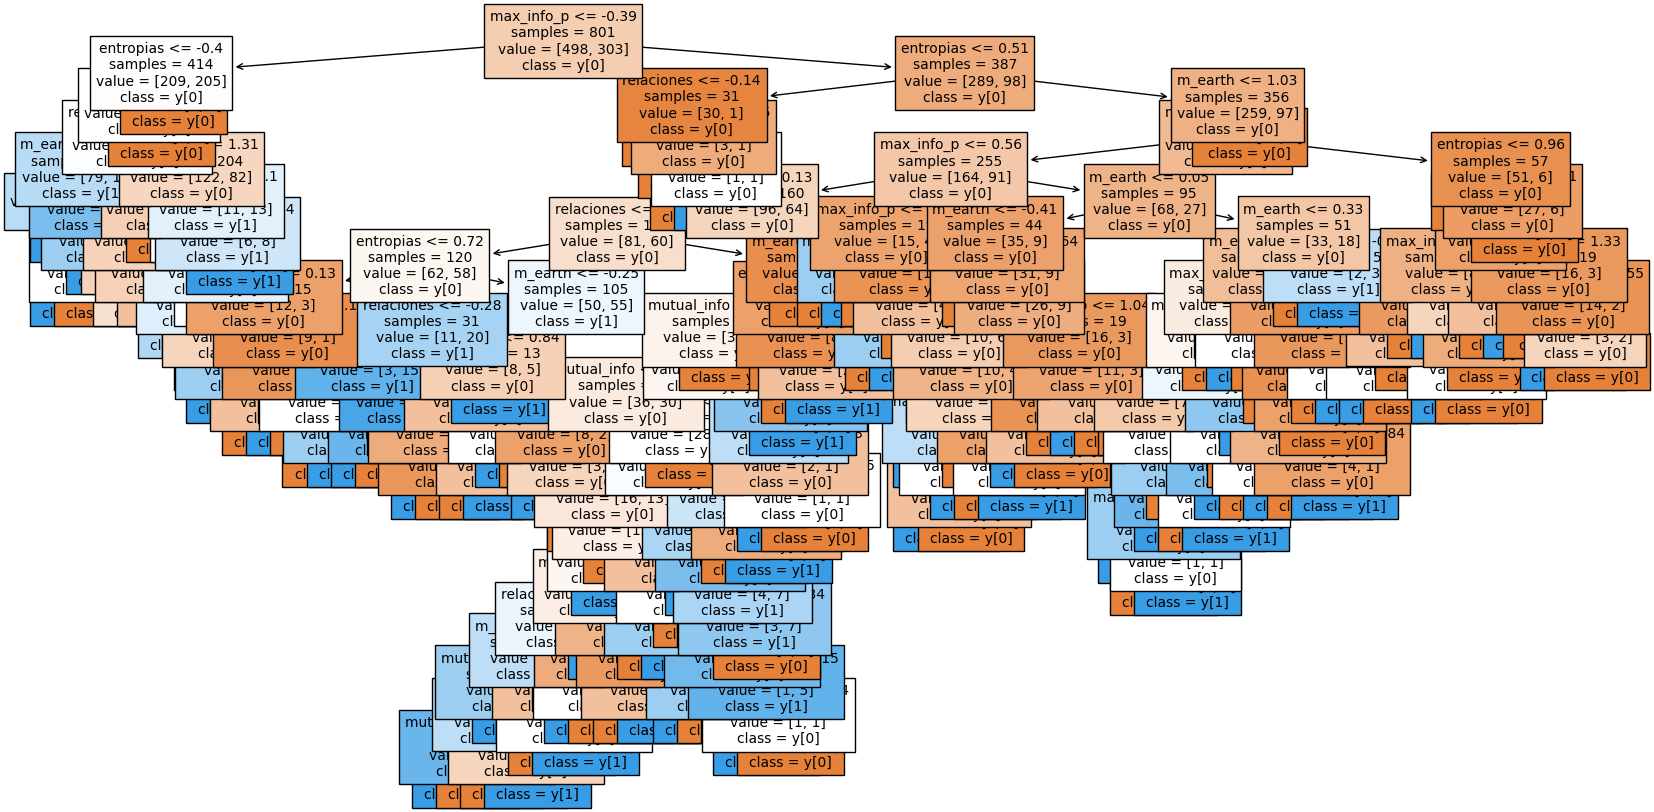

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )